# Predicting Flight Delays
- Name: Jace Martin
- Email: hjm46@pitt.edu

- Research Question: Is there some pattern in flight delays that we can use to predict future delays in the Atlanta Airport?

- Reason: I've always been interested in aviation and working in or with aviation as a career. I wanted to make a model that would have real impact in that industy.

- Usefulness: Predicting flights delays can help airlines accurately calculate how long a delay might take based on its nature and in turn inform passengers with a better estimate of how long it might take. This will help reduce passenger dissatisfaction with an airport or airline. Additionly, given centain factors, a passenger can estimate if and how long their plane might be delayed allowed them to prepare for the possibility.

- Benefit: Primarily airports and passengers, but it could also be used by airlines individually.

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Data
Data Source: Flight Ontime Reporting with Weather by William Parker

Parker, William. “Flight Ontime Reporting with Weather.” Kaggle.com, 2024, www.kaggle.com/datasets/williamparker20/flight-ontime-reporting-with-weather/data. Accessed 13 Dec. 2024.

‌This dataset consists multiple folders for different airports but I will jsut be focusing on Atlanta Airport (ATL).

In [138]:
df = pd.read_csv("ATL.csv")

#### Exploring the Data
Using .head() to show the first five rows of the dataset

In [139]:
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,NaN,True,15.0,2.0,0.0,...,13.0,66.0,66.0,1014.90,1014.6,8046.7,8.06,20.71,1.02,0.0
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,NaN,True,15.0,2.0,0.0,...,13.0,66.0,66.0,1014.90,1018.0,16093.4,10.36,24.74,0.51,0.0
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,62.0,62.1,1016.26,1015.8,16093.4,5.75,24.74,0.00,0.0
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,NaN,True,23.0,23.0,0.0,...,0.0,50.0,50.0,1016.93,1017.2,16093.4,14.96,20.71,0.00,0.0
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,56.0,55.9,1016.93,1017.0,16093.4,6.90,24.74,0.00,0.0


Using .info() to get the datatypes of each of column and how much space the whole dataframe takes up

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130743 entries, 0 to 1130742
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Time                    1130743 non-null  object 
 1   Origin                  1130743 non-null  object 
 2   Dest                    1130743 non-null  object 
 3   Carrier                 1130743 non-null  object 
 4   Cancelled               1130743 non-null  bool   
 5   CancellationReason      12772 non-null    object 
 6   Delayed                 1130743 non-null  bool   
 7   DepDelayMinutes         1118248 non-null  float64
 8   CarrierDelay            206887 non-null   float64
 9   WeatherDelay            206887 non-null   float64
 10  NASDelay                206887 non-null   float64
 11  SecurityDelay           206887 non-null   float64
 12  LateAircraftDelay       206887 non-null   float64
 13  Temperature             1130743 non-null  float64
 14  Fe

Using .describe() to get statistical information about each column like number of non null values, mean, standard deviation, and quartile ranges

In [141]:
df.describe()

,DepDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
count,1.118248e+06,206887.000000,206887.000000,206887.000000,206887.000000,206887.000000,1.130743e+06,1.130743e+06,1.130743e+06,1.130743e+06,1.130743e+06,1.130743e+06,1.130743e+06,1.130743e+06,1.130743e+06
mean,1.262744e+01,28.639040,5.204793,11.564216,0.149333,15.164960,6.634715e+01,6.615163e+01,1.018303e+03,1.018113e+03,1.436971e+04,8.408157e+00,2.470250e+01,2.558553e-01,2.202092e-06
std,4.216015e+01,63.878674,34.983563,28.428706,4.841131,40.138207,1.409437e+01,1.637214e+01,5.183926e+00,4.925616e+00,3.963522e+03,4.556323e+00,2.336625e+00,1.515183e+00,2.570174e-04
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.100000e+00,-8.420000e+00,9.969500e+02,9.962000e+02,0.000000e+00,0.000000e+00,1.611000e+01,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,5.600000e+01,5.600000e+01,1.014900e+03,1.015300e+03,1.609340e+04,5.750000e+00,2.474000e+01,0.000000e+00,0.000000e+00
50%,0.000000e+00,13.000000,0.000000,0.000000,0.000000,0.000000,6.800000e+01,6.800000e+01,1.018290e+03,1.018000e+03,1.609340e+04,8.060000e+00,2.474000e+01,0.000000e+00,0.000000e+00
75%,8.000000e+00,32.000000,0.000000,15.000000,0.000000,15.000000,7.700000e+01,7.700000e+01,1.021670e+03,1.020600e+03,1.609340e+04,1.036000e+01,2.474000e+01,0.000000e+00,0.000000e+00
max,3.221000e+03,3221.000000,1192.000000,1300.000000,1132.000000,2216.000000,9.900000e+01,1.084900e+02,1.038610e+03,1.039000e+03,1.609340e+04,8.631000e+01,7.135000e+01,4.597000e+01,3.000000e-02


### Checking for Missing Values

Using .isnull().sum() to get the number of missing values for each column

In [142]:
print(df.isnull().sum())

Time                            0
Origin                          0
Dest                            0
Carrier                         0
Cancelled                       0
CancellationReason        1117971
Delayed                         0
DepDelayMinutes             12495
CarrierDelay               923856
WeatherDelay               923856
NASDelay                   923856
SecurityDelay              923856
LateAircraftDelay          923856
Temperature                     0
Feels_Like_Temperature          0
Altimeter_Pressure              0
Sea_Level_Pressure              0
Visibility                      0
Wind_Speed                      0
Wind_Gust                       0
Precipitation                   0
Ice_Accretion_3hr               0
dtype: int64


Making a heatmap of missing values to see the distribution of missing values across the whole dataframe

Text(0.5, 1.0, 'Heatmap of Missing Values')

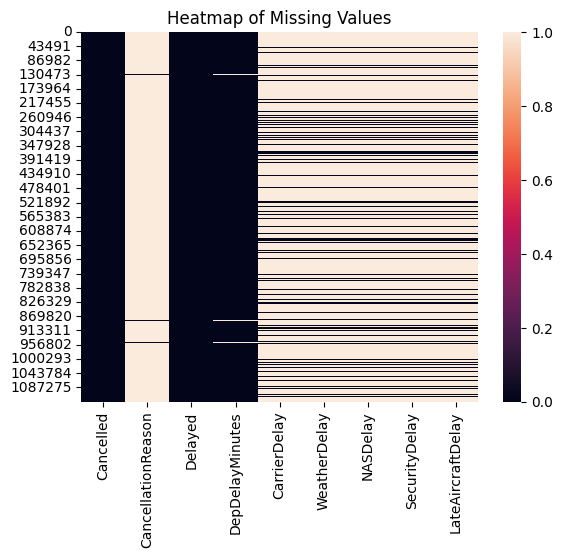

In [143]:
temp_df = df[["Cancelled", "CancellationReason", "Delayed", "DepDelayMinutes", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]]
sns.heatmap(data=temp_df.isnull())
plt.title("Heatmap of Missing Values")

I think all the missing values for the delays is because the plane wasn't delayed, so we can replace them with zeros. Same with the missing values for CancellationReason, except we'll replace those with a value for "Not Cancelled".

In [144]:
df["CancellationReason"].unique()

array([nan, 'Weather', 'Carrier', 'National Air System', 'Security'],
      dtype=object)

In [145]:
df["CancellationReason"] = df["CancellationReason"].fillna("Not Cancelled")
df["CarrierDelay"] = df["CarrierDelay"].fillna(0)
df["WeatherDelay"] = df["WeatherDelay"].fillna(0)
df["NASDelay"] = df["NASDelay"].fillna(0)
df["SecurityDelay"] = df["SecurityDelay"].fillna(0)
df["LateAircraftDelay"] = df["LateAircraftDelay"].fillna(0)
df["DepDelayMinutes"] = df["DepDelayMinutes"].fillna(0)

### Exploring the Data

Categorial Columns (Carrier, Dest, Delayed, Cancelled, CancellationReason)

Exploring all the airlines represented in the Carrier column with .value_counts()

In [146]:
df["Carrier"].value_counts()

Carrier
Delta Air Lines Inc.      719603
Endeavor Air Inc.         119096
Southwest Airlines Co.    114221
Spirit Air Lines           38981
Frontier Airlines Inc.     27943
American Airlines Inc.     26304
Republic Airline           22683
SkyWest Airlines Inc.      19904
United Air Lines Inc.      18080
JetBlue Airways             9458
PSA Airlines Inc.           4510
Mesa Airlines Inc.          3670
Alaska Airlines Inc.        3265
Envoy Air                   3025
Name: count, dtype: int64

Visualizing airline counts with a bar chart

Text(0.5, 1.0, 'Counts of Airlines Represented')

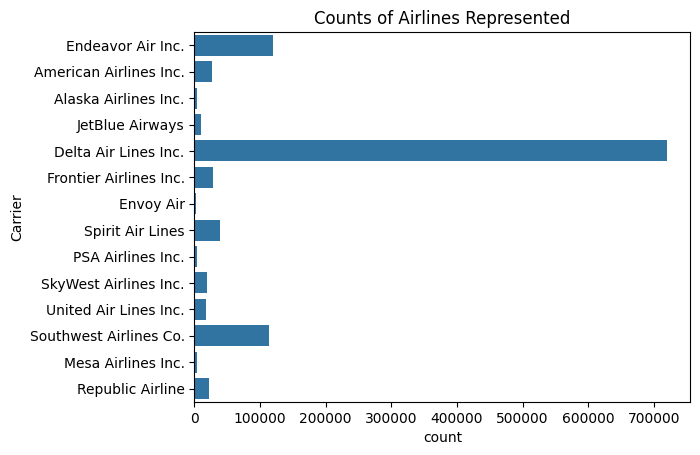

In [147]:
sns.countplot(data=df["Carrier"])
plt.title("Counts of Airlines Represented")

Exploring what destination airports are in the Dest column with .unique()

In [148]:
df["Dest"].unique()

array(['HOU', 'GPT', 'CAE', 'CHO', 'MOB', 'TRI', 'MSN', 'OAJ', 'SAV',
       'DHN', 'AVL', 'JAN', 'VLD', 'GSO', 'LFT', 'GNV', 'LEX', 'OMA',
       'CHA', 'GRB', 'BTR', 'BMI', 'CHS', 'TYS', 'XNA', 'MGM', 'TUL',
       'AGS', 'BHM', 'BQK', 'HSV', 'ICT', 'MLU', 'IAD', 'TLH', 'VPS',
       'DSM', 'ABY', 'FAY', 'OKC', 'AEX', 'ROA', 'CRW', 'BUF', 'ECP',
       'GSP', 'DAL', 'GTR', 'SGF', 'DAY', 'CSG', 'ILM', 'SHV', 'LIT',
       'MYR', 'FWA', 'ATW', 'ALB', 'EVV', 'ABE', 'MLI', 'SBN', 'MDT',
       'CLT', 'MIA', 'DFW', 'PHX', 'ORD', 'SEA', 'FLL', 'JFK', 'BOS',
       'MCO', 'SMF', 'LAX', 'LGA', 'DCA', 'LAS', 'GEG', 'SAN', 'ONT',
       'BOI', 'SJU', 'PDX', 'SFO', 'TUS', 'DAB', 'SNA', 'PWM', 'DTW',
       'SLC', 'DEN', 'ELP', 'MSP', 'AUS', 'HNL', 'BDL', 'EWR', 'SAT',
       'SYR', 'IAH', 'PHL', 'TPA', 'MCI', 'ROC', 'MKE', 'GRR', 'MLB',
       'BWI', 'PBI', 'CLE', 'ORF', 'STL', 'RSW', 'CVG', 'CMH', 'SRQ',
       'MSY', 'IND', 'RDU', 'MEM', 'SDF', 'JAX', 'PNS', 'PIT', 'JAC',
       'BNA', 'RIC',

There are too many different airports in this column for a barchart visualization to be meaningful.

Exploring the distributions of Delayed/Not Delayed, Cancelled/Not Cancelled, and Cancellation Reason

Text(0.5, 1.0, 'Counts of Planes Delayed')

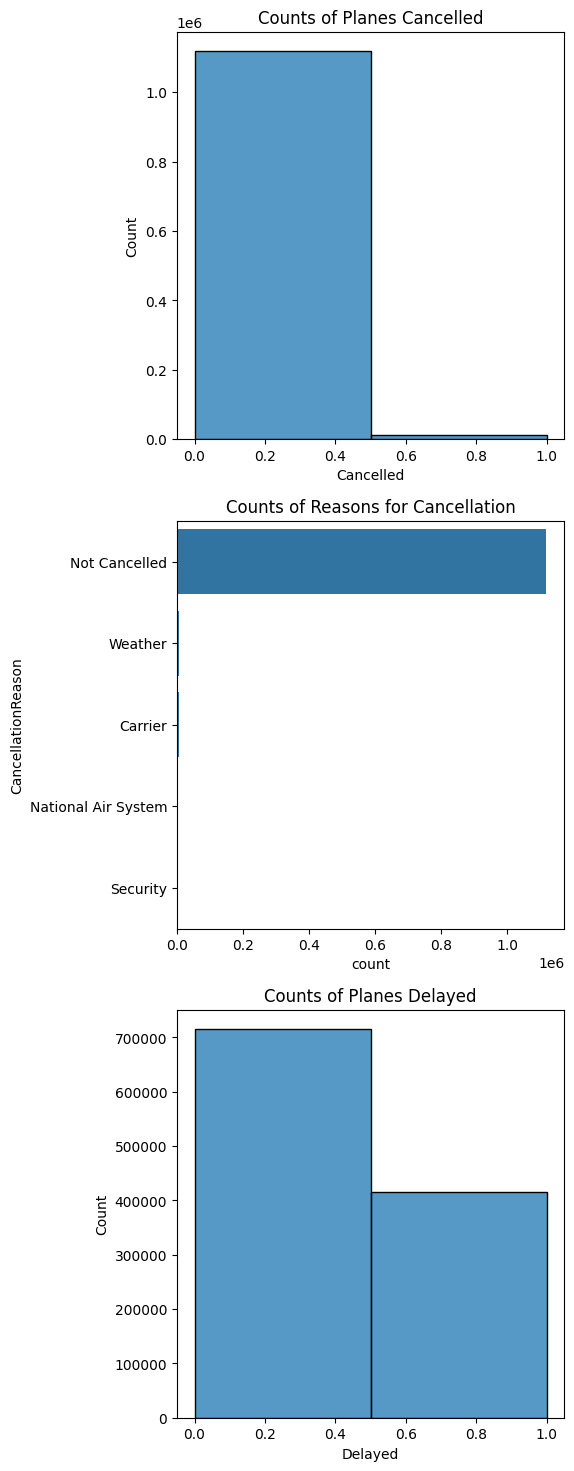

In [149]:
fig, axes = plt.subplots(3, figsize=(5,18))
sns.histplot(data=df["Cancelled"], ax=axes[0], bins=2)
axes[0].set_title("Counts of Planes Cancelled")

sns.countplot(data=df["CancellationReason"], ax=axes[1])
axes[1].set_title("Counts of Reasons for Cancellation")

sns.histplot(data=df["Delayed"], ax=axes[2], bins=2)
axes[2].set_title("Counts of Planes Delayed")

### Checking for Outliers

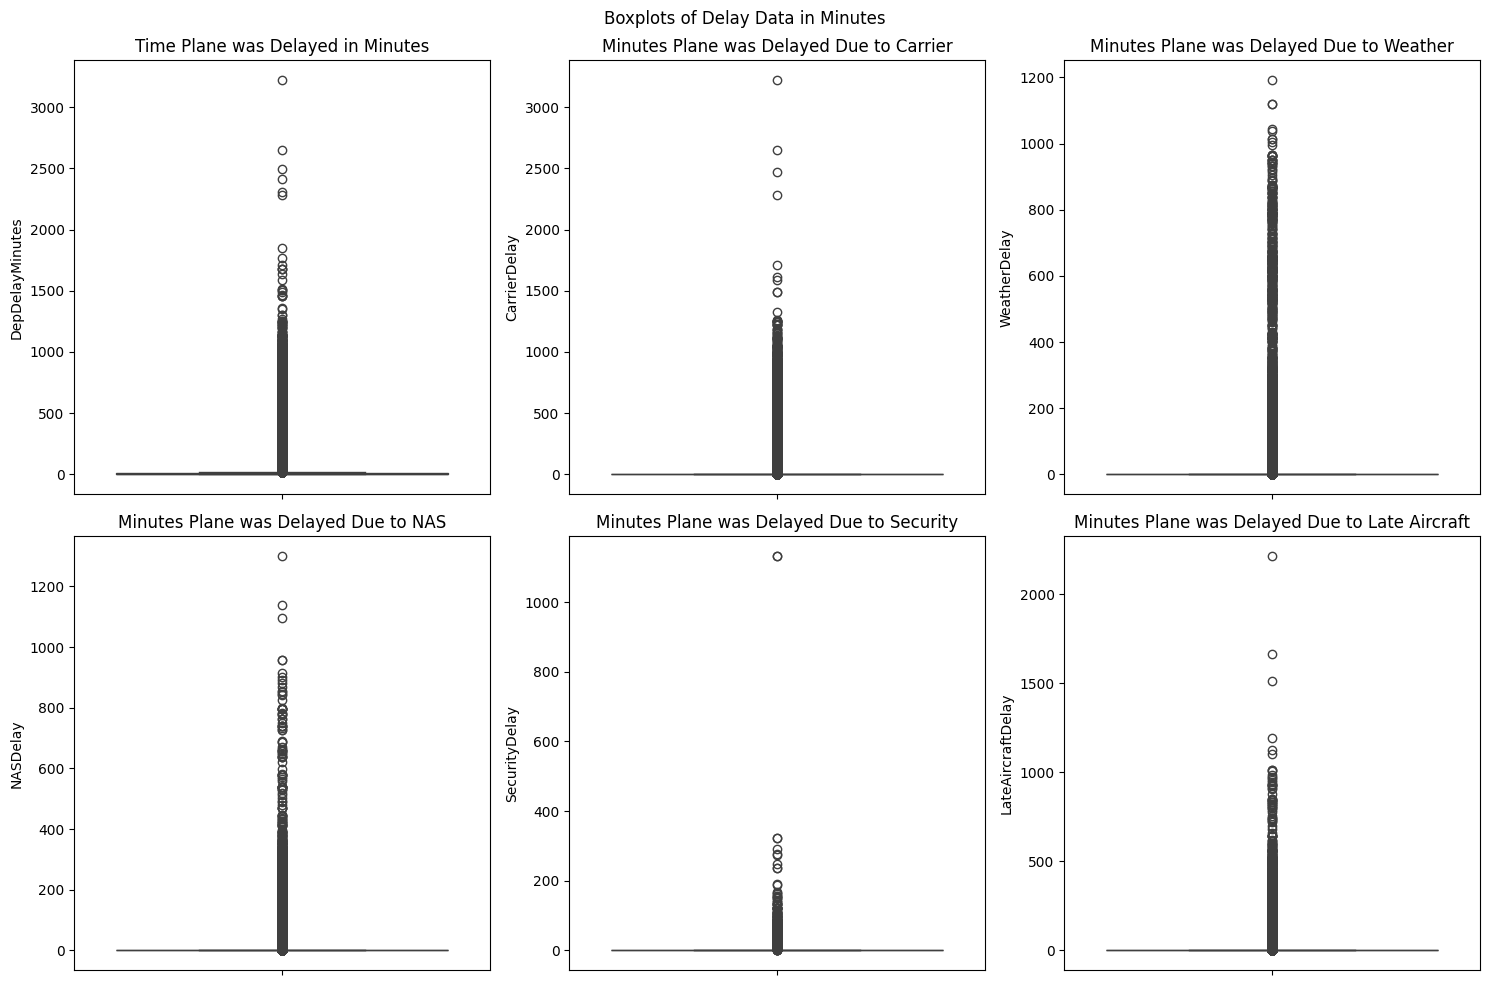

In [150]:
fig, axes = plt.subplots(2,3, figsize=(15,10))

sns.boxplot(data=df["DepDelayMinutes"], ax=axes[0,0])
axes[0,0].set_title("Time Plane was Delayed in Minutes")

sns.boxplot(data=df["CarrierDelay"], ax=axes[0,1])
axes[0,1].set_title("Minutes Plane was Delayed Due to Carrier")

sns.boxplot(data=df["WeatherDelay"], ax=axes[0,2])
axes[0,2].set_title("Minutes Plane was Delayed Due to Weather")

sns.boxplot(data=df["NASDelay"], ax=axes[1,0])
axes[1,0].set_title("Minutes Plane was Delayed Due to NAS")

sns.boxplot(data=df["SecurityDelay"], ax=axes[1,1])
axes[1,1].set_title("Minutes Plane was Delayed Due to Security")

sns.boxplot(data=df["LateAircraftDelay"], ax=axes[1,2])
axes[1,2].set_title("Minutes Plane was Delayed Due to Late Aircraft")

fig.suptitle("Boxplots of Delay Data in Minutes")
plt.tight_layout()
plt.show()


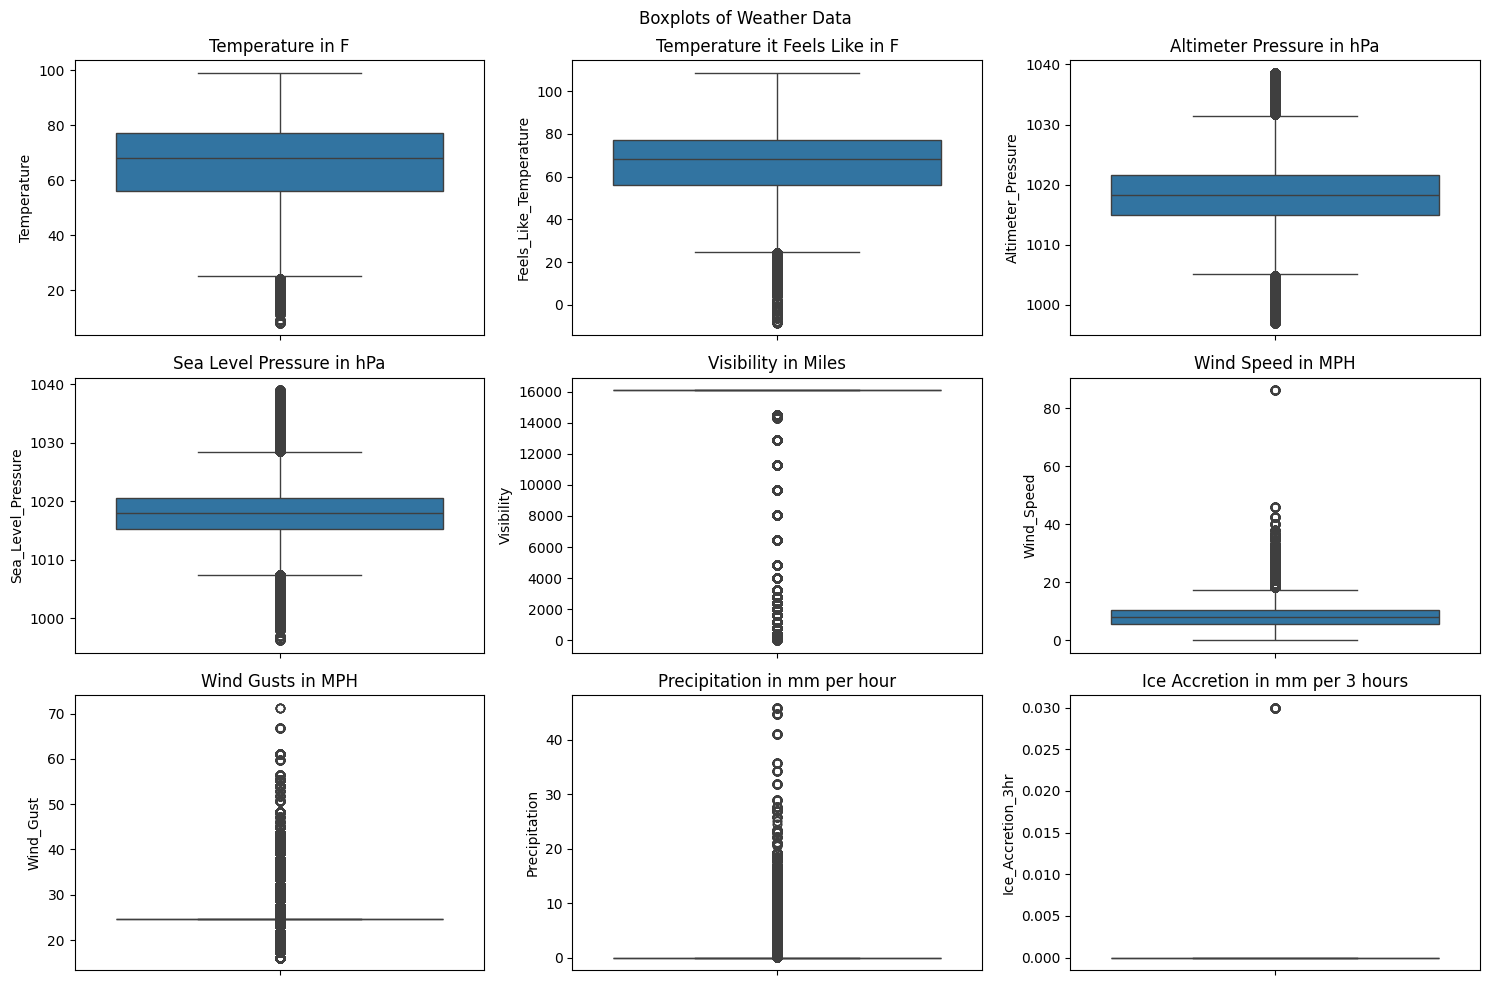

In [151]:
fig, axes = plt.subplots(3,3, figsize=(15,10))
sns.boxplot(data=df["Temperature"], ax=axes[0,0])
axes[0,0].set_title("Temperature in F")

sns.boxplot(data=df["Feels_Like_Temperature"], ax=axes[0,1])
axes[0,1].set_title("Temperature it Feels Like in F")

sns.boxplot(data=df["Altimeter_Pressure"], ax=axes[0,2])
axes[0,2].set_title("Altimeter Pressure in hPa")

sns.boxplot(data=df["Sea_Level_Pressure"], ax=axes[1,0])
axes[1,0].set_title("Sea Level Pressure in hPa")

sns.boxplot(data=df["Visibility"], ax=axes[1,1])
axes[1,1].set_title("Visibility in Miles")

sns.boxplot(data=df["Wind_Speed"], ax=axes[1,2])
axes[1,2].set_title("Wind Speed in MPH")

sns.boxplot(data=df["Wind_Gust"], ax=axes[2,0])
axes[2,0].set_title("Wind Gusts in MPH")

sns.boxplot(data=df["Precipitation"], ax=axes[2,1])
axes[2,1].set_title("Precipitation in mm per hour")

sns.boxplot(data=df["Ice_Accretion_3hr"], ax=axes[2,2])
axes[2,2].set_title("Ice Accretion in mm per 3 hours")

fig.suptitle("Boxplots of Weather Data")
plt.tight_layout()
plt.show()

After some analysis on Wind Speed and Ice Accretion, I cannot conclude any of the outliers to impossible. Therefore I must keep all of these outliers as valid values.

### Checking Distributions of Numerical Data

Get rid of categorical data here

Checking Distributions of Delay Data

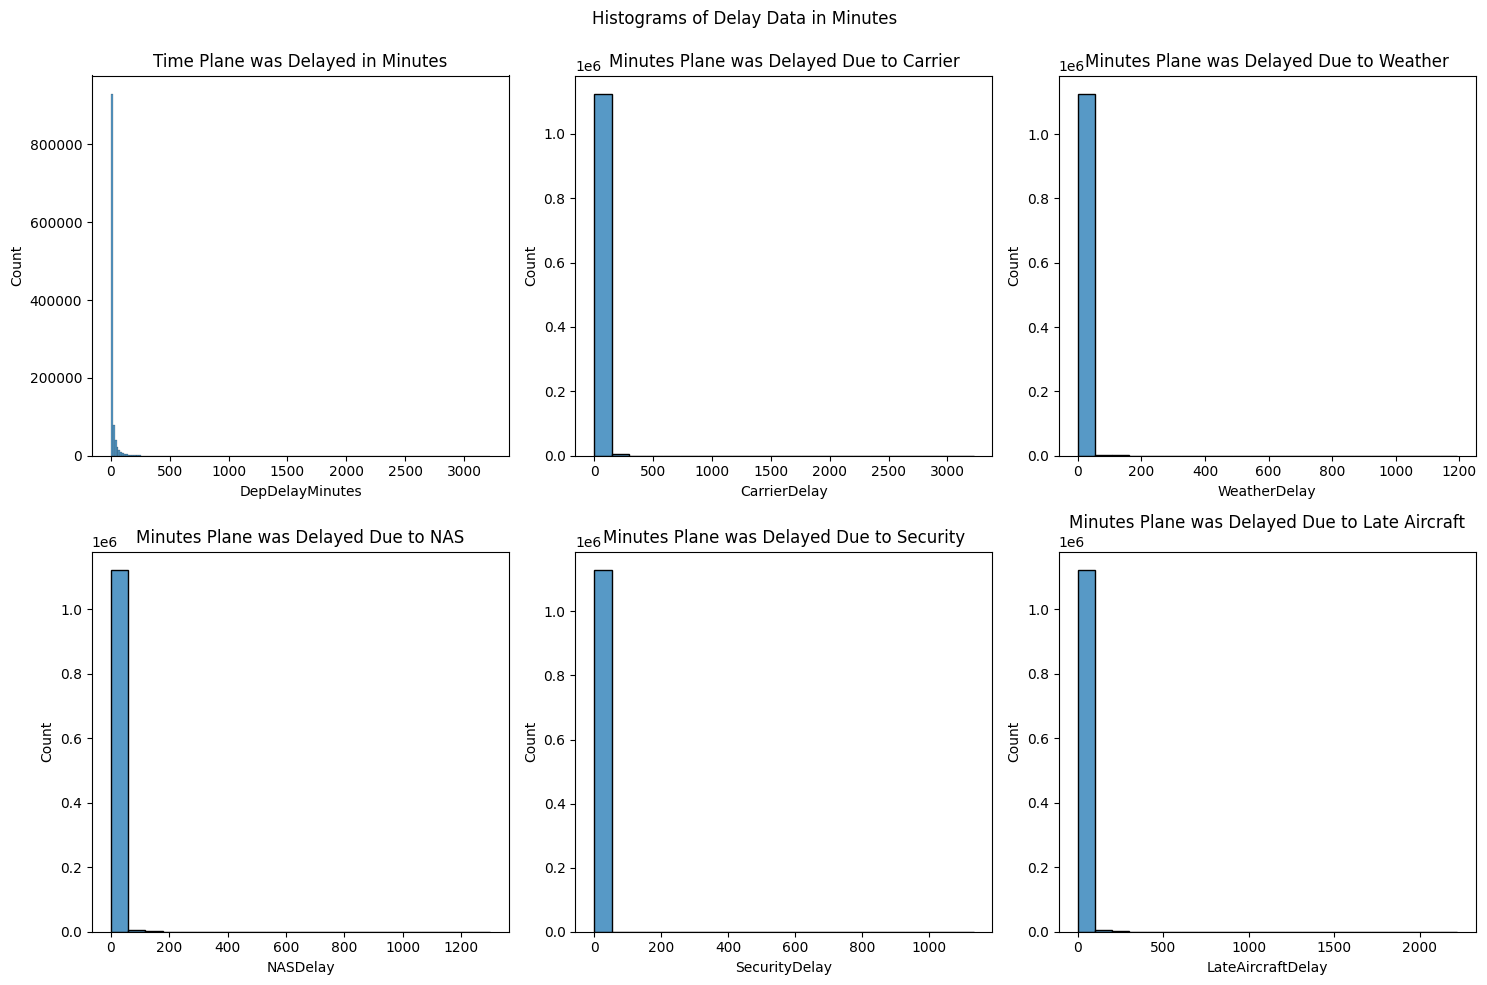

In [152]:
fig, axes = plt.subplots(2,3, figsize=(15,10))

sns.histplot(data=df["DepDelayMinutes"], ax=axes[0,0], bins=200)    # in order to see the distribution better
axes[0,0].set_title("Time Plane was Delayed in Minutes")

sns.histplot(data=df["CarrierDelay"], ax=axes[0,1])
axes[0,1].set_title("Minutes Plane was Delayed Due to Carrier")

sns.histplot(data=df["WeatherDelay"], ax=axes[0,2])
axes[0,2].set_title("Minutes Plane was Delayed Due to Weather")

sns.histplot(data=df["NASDelay"], ax=axes[1,0])
axes[1,0].set_title("Minutes Plane was Delayed Due to NAS")

sns.histplot(data=df["SecurityDelay"], ax=axes[1,1])
axes[1,1].set_title("Minutes Plane was Delayed Due to Security")

sns.histplot(data=df["LateAircraftDelay"], ax=axes[1,2])
axes[1,2].set_title("Minutes Plane was Delayed Due to Late Aircraft")

fig.suptitle("Histograms of Delay Data in Minutes")
plt.tight_layout()
plt.show()

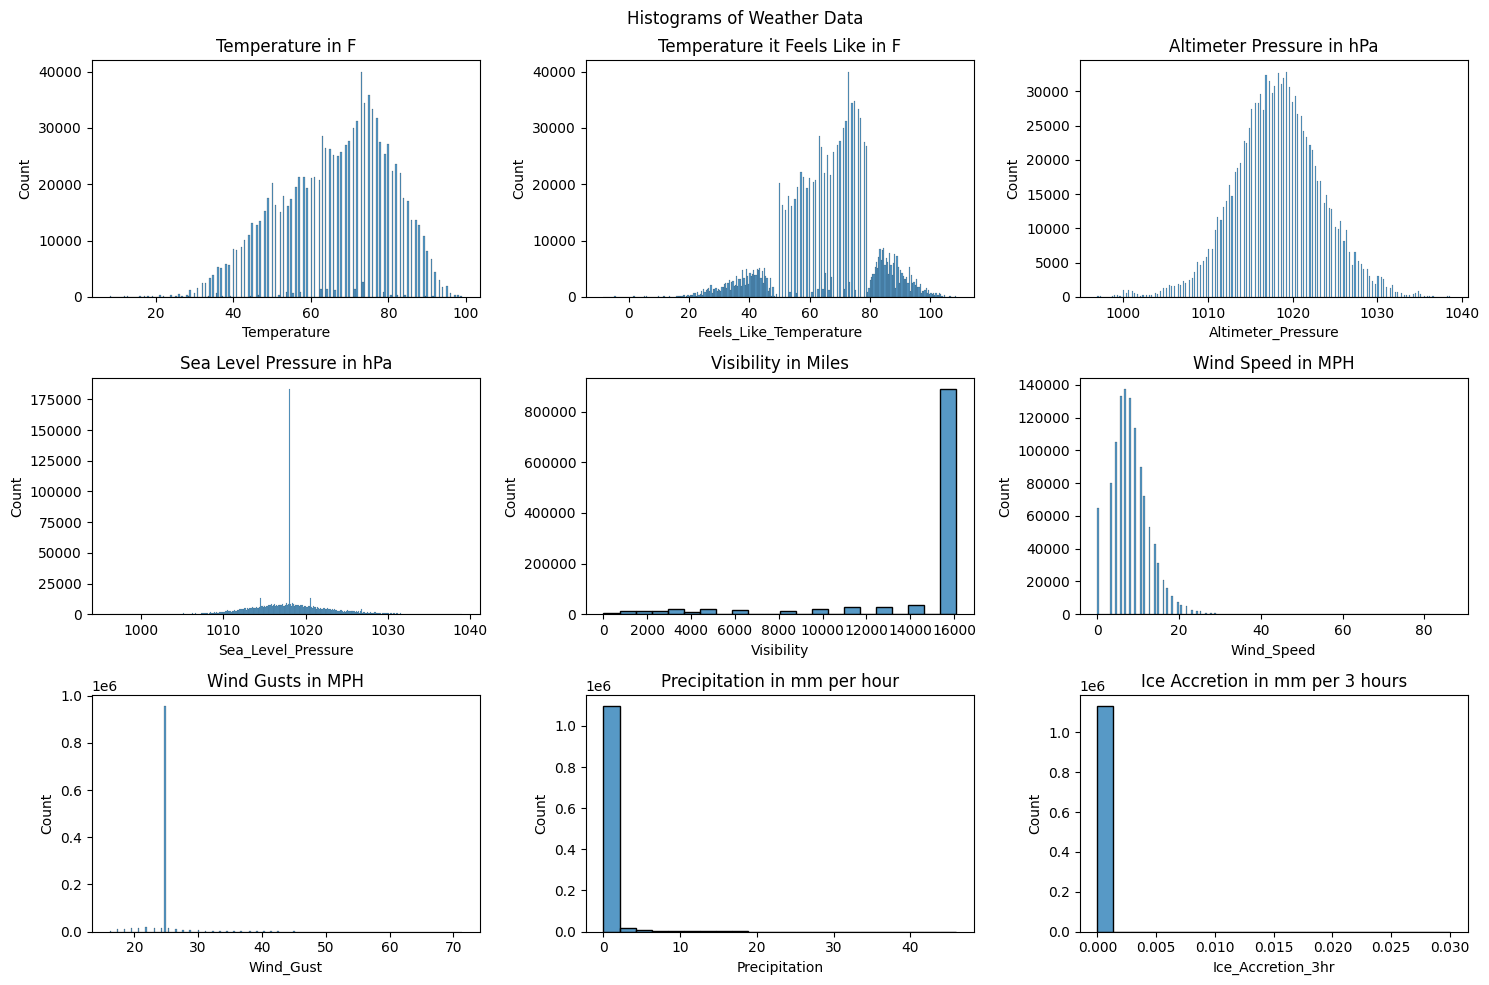

In [153]:
fig, axes = plt.subplots(3,3, figsize=(15,10))
sns.histplot(data=df["Temperature"], ax=axes[0,0])
axes[0,0].set_title("Temperature in F")

sns.histplot(data=df["Feels_Like_Temperature"], ax=axes[0,1])
axes[0,1].set_title("Temperature it Feels Like in F")

sns.histplot(data=df["Altimeter_Pressure"], ax=axes[0,2])
axes[0,2].set_title("Altimeter Pressure in hPa")

sns.histplot(data=df["Sea_Level_Pressure"], ax=axes[1,0])
axes[1,0].set_title("Sea Level Pressure in hPa")

sns.histplot(data=df["Visibility"], ax=axes[1,1])
axes[1,1].set_title("Visibility in Miles")

sns.histplot(data=df["Wind_Speed"], ax=axes[1,2], bins=200)
axes[1,2].set_title("Wind Speed in MPH")

sns.histplot(data=df["Wind_Gust"], ax=axes[2,0], bins=200)
axes[2,0].set_title("Wind Gusts in MPH")

sns.histplot(data=df["Precipitation"], ax=axes[2,1])
axes[2,1].set_title("Precipitation in mm per hour")

sns.histplot(data=df["Ice_Accretion_3hr"], ax=axes[2,2])
axes[2,2].set_title("Ice Accretion in mm per 3 hours")

fig.suptitle("Histograms of Weather Data")
plt.tight_layout()
plt.show()

After thinking and examinating the histograms, I think i will drop FeelsLikeTemp from consideration for this model. I think FeelsLikeTemp takes into account wind and precipitation and we have that data already so FeelsLikeTemp is a bit redundant.

After examinations of the histograms, I think I will only transform Temperature. The other variables distributions are very skewed so I think my model would benefit from them being encoded into categories. We can't use the standard categories for things like wind speed if we transform those variables. I won't be encoding Sea_Level_Pressure however because I think this variable is fairly normally distributed. I will transform Temperature using squared transform because it is left skewed, however I will need to add a constant to every value to account for the negatives. Neither Temperature nor Sea_Level_Pressure have extremely large values so I will not be scaling them.


In [154]:
df["Temperature_transform"] = (df["Temperature"]+25)**2

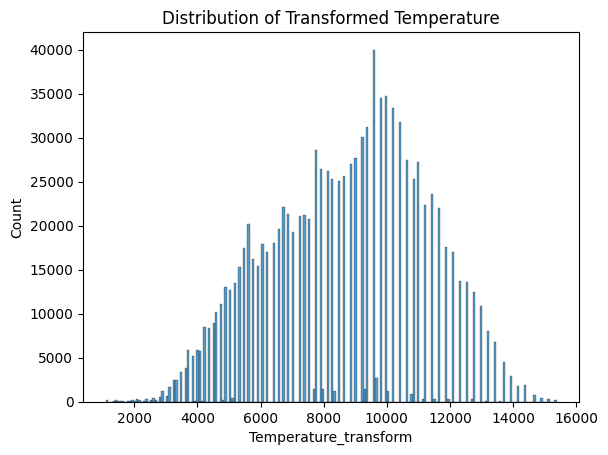

In [155]:
sns.histplot(df["Temperature_transform"])
plt.title("Distribution of Transformed Temperature")
plt.show()

### Encoding
Because the crucial data in varibles like Visibility is in the minority and there are standarized categories for classification, I will be using value count encoding for Dest, Carrier, CancellationReason, Visibility, Wind_Speed, Wind_Gust, Precepitation, and Ice Accretion. I decided to use value count encoding because there are a large number of categories so one hot encoding would significantly increase the number of columns and this is a large dataset so there's less likelyhood of value counts between classes clashing.

In [156]:
frequency = df["Dest"].value_counts().to_dict()
frequency

{'MCO': 28382,
 'FLL': 26528,
 'LGA': 25195,
 'MIA': 23865,
 'TPA': 21723,
 'DCA': 21344,
 'DFW': 20677,
 'ORD': 20495,
 'DEN': 20409,
 'EWR': 20246,
 'PHL': 19336,
 'BWI': 18903,
 'LAX': 18139,
 'CLT': 17723,
 'DTW': 16767,
 'LAS': 16262,
 'IAH': 16097,
 'BOS': 15741,
 'MSY': 14751,
 'RDU': 14546,
 'JAX': 14128,
 'BNA': 13381,
 'AUS': 13243,
 'PBI': 13175,
 'MSP': 12881,
 'IAD': 12062,
 'JFK': 12051,
 'PHX': 11878,
 'DAL': 11716,
 'RSW': 11451,
 'SEA': 11385,
 'MDW': 11265,
 'MEM': 11265,
 'CLE': 11131,
 'RIC': 11085,
 'IND': 10955,
 'GSP': 10929,
 'HOU': 10888,
 'STL': 10885,
 'SLC': 10566,
 'SDF': 10320,
 'JAN': 10310,
 'MCI': 10267,
 'CHS': 10055,
 'CMH': 9920,
 'SAT': 9870,
 'BHM': 9613,
 'SAV': 9465,
 'SRQ': 9312,
 'TYS': 9000,
 'SFO': 8880,
 'PNS': 8877,
 'PIT': 8739,
 'CVG': 8628,
 'ORF': 8264,
 'LIT': 8180,
 'CHA': 8169,
 'GSO': 8008,
 'ECP': 7727,
 'MKE': 7693,
 'CAE': 7550,
 'OKC': 7448,
 'LEX': 7386,
 'AGS': 7384,
 'OMA': 7383,
 'HSV': 7291,
 'VPS': 7270,
 'BDL': 7030,
 'AV

In [157]:
df["Dest_counts"] = df["Dest"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr,Temperature_transform,Dest_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,66.0,1014.90,1014.6,8046.7,8.06,20.71,1.02,0.0,8281.0,10888
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,66.0,1014.90,1018.0,16093.4,10.36,24.74,0.51,0.0,8281.0,10888
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,62.1,1016.26,1015.8,16093.4,5.75,24.74,0.00,0.0,7569.0,10888
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,50.0,1016.93,1017.2,16093.4,14.96,20.71,0.00,0.0,5625.0,10888
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,55.9,1016.93,1017.0,16093.4,6.90,24.74,0.00,0.0,6561.0,10888


In [158]:
frequency = df["Carrier"].value_counts().to_dict()
frequency

{'Delta Air Lines Inc.': 719603,
 'Endeavor Air Inc.': 119096,
 'Southwest Airlines Co.': 114221,
 'Spirit Air Lines': 38981,
 'Frontier Airlines Inc.': 27943,
 'American Airlines Inc.': 26304,
 'Republic Airline': 22683,
 'SkyWest Airlines Inc.': 19904,
 'United Air Lines Inc.': 18080,
 'JetBlue Airways': 9458,
 'PSA Airlines Inc.': 4510,
 'Mesa Airlines Inc.': 3670,
 'Alaska Airlines Inc.': 3265,
 'Envoy Air': 3025}

In [159]:
df["Carrier_counts"] = df["Carrier"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr,Temperature_transform,Dest_counts,Carrier_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,1014.90,1014.6,8046.7,8.06,20.71,1.02,0.0,8281.0,10888,119096
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,1014.90,1018.0,16093.4,10.36,24.74,0.51,0.0,8281.0,10888,119096
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,1016.26,1015.8,16093.4,5.75,24.74,0.00,0.0,7569.0,10888,119096
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,1016.93,1017.2,16093.4,14.96,20.71,0.00,0.0,5625.0,10888,119096
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,1016.93,1017.0,16093.4,6.90,24.74,0.00,0.0,6561.0,10888,119096


In [160]:
frequency = df["CancellationReason"].value_counts().to_dict()
frequency

{'Not Cancelled': 1117971,
 'Carrier': 5916,
 'Weather': 5903,
 'National Air System': 913,
 'Security': 40}

In [161]:
df["Cancellation_counts"] = df["CancellationReason"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr,Temperature_transform,Dest_counts,Carrier_counts,Cancellation_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,1014.6,8046.7,8.06,20.71,1.02,0.0,8281.0,10888,119096,1117971
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,1018.0,16093.4,10.36,24.74,0.51,0.0,8281.0,10888,119096,1117971
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,1015.8,16093.4,5.75,24.74,0.00,0.0,7569.0,10888,119096,1117971
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,1017.2,16093.4,14.96,20.71,0.00,0.0,5625.0,10888,119096,1117971
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,1017.0,16093.4,6.90,24.74,0.00,0.0,6561.0,10888,119096,1117971


### Ranges for Visibility encoding
From Think Aviation

“The Differences between VFR, MVFR, IFR and LIFR.” ThinkAviation, 4 June 2018, www.thinkaviation.net/levels-of-vfr-ifr-explained/.

* Visual Flight Rules: >5 miles, >8048 meters
* Mariginal Visual Flight Rules: 3-5 miles, 4828-8048 meters
* Instument Flight Rules: 1-3 miles, 1610-4828 meters
* Low Instrument Flight Rules: <1 mile, <1610 meters

In [162]:
df["Visibility_classes"] = pd.cut(df["Visibility"], [0, 1610, 4828, 8048, 100000], right=False,
                       labels=["Low Instrument Flight Rules", "Instument Flight Rules", 
                               "Mariginal Visual Flight Rules", "Visual Flight Rules"])
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr,Temperature_transform,Dest_counts,Carrier_counts,Cancellation_counts,Visibility_classes
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,8046.7,8.06,20.71,1.02,0.0,8281.0,10888,119096,1117971,Mariginal Visual Flight Rules
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,16093.4,10.36,24.74,0.51,0.0,8281.0,10888,119096,1117971,Visual Flight Rules
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,16093.4,5.75,24.74,0.00,0.0,7569.0,10888,119096,1117971,Visual Flight Rules
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,16093.4,14.96,20.71,0.00,0.0,5625.0,10888,119096,1117971,Visual Flight Rules
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,16093.4,6.90,24.74,0.00,0.0,6561.0,10888,119096,1117971,Visual Flight Rules


In [163]:
frequency = df["Visibility_classes"].value_counts().to_dict()
frequency

{'Visual Flight Rules': 1007437,
 'Mariginal Visual Flight Rules': 51045,
 'Instument Flight Rules': 43267,
 'Low Instrument Flight Rules': 28994}

In [164]:
df["Visibility_counts"] = df["Visibility_classes"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr,Temperature_transform,Dest_counts,Carrier_counts,Cancellation_counts,Visibility_classes,Visibility_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,8.06,20.71,1.02,0.0,8281.0,10888,119096,1117971,Mariginal Visual Flight Rules,51045
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,10.36,24.74,0.51,0.0,8281.0,10888,119096,1117971,Visual Flight Rules,1007437
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,5.75,24.74,0.00,0.0,7569.0,10888,119096,1117971,Visual Flight Rules,1007437
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,14.96,20.71,0.00,0.0,5625.0,10888,119096,1117971,Visual Flight Rules,1007437
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,6.90,24.74,0.00,0.0,6561.0,10888,119096,1117971,Visual Flight Rules,1007437


### Ranges for Wind Speed and Wind Gust
I think there's more categories then we'll need so I will combine some. I am using the Beaufort scale from the National Weather Service.

US Department of Commerce, NOAA, National Weather Service. “Beaufort Scale.” Weather.gov, 2019, www.weather.gov/pqr/beaufort.

* Gentle Breeze: 0-10 mph
* Strong Breeze: 10-30 mph
* Gale: 30-50
* Storm: 50-70 mph
* Hurricane: >70 mph

In [165]:
df["WindSpeed_classes"] = pd.cut(df["Wind_Speed"], [0, 10, 30, 50, 70, 500], right=False,
                       labels=["Gentle Breeze", "Strong Breeze", "Gale", "Storm", "Hurricane"])
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Wind_Gust,Precipitation,Ice_Accretion_3hr,Temperature_transform,Dest_counts,Carrier_counts,Cancellation_counts,Visibility_classes,Visibility_counts,WindSpeed_classes
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,20.71,1.02,0.0,8281.0,10888,119096,1117971,Mariginal Visual Flight Rules,51045,Gentle Breeze
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,24.74,0.51,0.0,8281.0,10888,119096,1117971,Visual Flight Rules,1007437,Strong Breeze
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,24.74,0.00,0.0,7569.0,10888,119096,1117971,Visual Flight Rules,1007437,Gentle Breeze
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,20.71,0.00,0.0,5625.0,10888,119096,1117971,Visual Flight Rules,1007437,Strong Breeze
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,24.74,0.00,0.0,6561.0,10888,119096,1117971,Visual Flight Rules,1007437,Gentle Breeze


In [166]:
frequency = df["WindSpeed_classes"].value_counts().to_dict()
frequency

{'Gentle Breeze': 766107,
 'Strong Breeze': 363850,
 'Gale': 745,
 'Hurricane': 41,
 'Storm': 0}

In [167]:
df["WindSpeed_counts"] = df["WindSpeed_classes"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Precipitation,Ice_Accretion_3hr,Temperature_transform,Dest_counts,Carrier_counts,Cancellation_counts,Visibility_classes,Visibility_counts,WindSpeed_classes,WindSpeed_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,1.02,0.0,8281.0,10888,119096,1117971,Mariginal Visual Flight Rules,51045,Gentle Breeze,766107
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,0.51,0.0,8281.0,10888,119096,1117971,Visual Flight Rules,1007437,Strong Breeze,363850
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,0.00,0.0,7569.0,10888,119096,1117971,Visual Flight Rules,1007437,Gentle Breeze,766107
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,0.00,0.0,5625.0,10888,119096,1117971,Visual Flight Rules,1007437,Strong Breeze,363850
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,0.00,0.0,6561.0,10888,119096,1117971,Visual Flight Rules,1007437,Gentle Breeze,766107


In [168]:
df["WindGust_classes"] = pd.cut(df["Wind_Gust"], [0, 10, 30, 50, 70, 500], right=False,
                       labels=["Gentle Breeze", "Strong Breeze", "Gale", "Storm", "Hurricane"])
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Ice_Accretion_3hr,Temperature_transform,Dest_counts,Carrier_counts,Cancellation_counts,Visibility_classes,Visibility_counts,WindSpeed_classes,WindSpeed_counts,WindGust_classes
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,0.0,8281.0,10888,119096,1117971,Mariginal Visual Flight Rules,51045,Gentle Breeze,766107,Strong Breeze
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,0.0,8281.0,10888,119096,1117971,Visual Flight Rules,1007437,Strong Breeze,363850,Strong Breeze
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,0.0,7569.0,10888,119096,1117971,Visual Flight Rules,1007437,Gentle Breeze,766107,Strong Breeze
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,0.0,5625.0,10888,119096,1117971,Visual Flight Rules,1007437,Strong Breeze,363850,Strong Breeze
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,0.0,6561.0,10888,119096,1117971,Visual Flight Rules,1007437,Gentle Breeze,766107,Strong Breeze


In [169]:
frequency = df["WindGust_classes"].value_counts().to_dict()
frequency

{'Strong Breeze': 1107278,
 'Gale': 22685,
 'Storm': 774,
 'Hurricane': 6,
 'Gentle Breeze': 0}

In [170]:
df["WindGust_counts"] = df["WindGust_classes"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Temperature_transform,Dest_counts,Carrier_counts,Cancellation_counts,Visibility_classes,Visibility_counts,WindSpeed_classes,WindSpeed_counts,WindGust_classes,WindGust_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,8281.0,10888,119096,1117971,Mariginal Visual Flight Rules,51045,Gentle Breeze,766107,Strong Breeze,1107278
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,8281.0,10888,119096,1117971,Visual Flight Rules,1007437,Strong Breeze,363850,Strong Breeze,1107278
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,7569.0,10888,119096,1117971,Visual Flight Rules,1007437,Gentle Breeze,766107,Strong Breeze,1107278
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,5625.0,10888,119096,1117971,Visual Flight Rules,1007437,Strong Breeze,363850,Strong Breeze,1107278
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,6561.0,10888,119096,1117971,Visual Flight Rules,1007437,Gentle Breeze,766107,Strong Breeze,1107278


### Ranges for Precipitation
from Barani Design Meteorological Sensors and Weather Stations

Barani, Jan. “Rain Rate Intensity Classification.” BARANI DESIGN Technologies, 19 Jan. 2020, www.baranidesign.com/faq-articles/2020/1/19/rain-rate-intensity-classification.

* Light Rain: <2.5 mm/h
* Moderate Rain: 2.5-7.5 mm/h
* Heavy Rain: 7.5-50 mm/h
* Violent Rain: >50 mm/h

In [171]:
df["Precipitation_classes"] = pd.cut(df["Precipitation"], [0, 2.5, 7.5, 50, 500], right=False,
                       labels=["Light Rain", "Moderate Rain", "Heavy Rain", "Violent Rain"])
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Dest_counts,Carrier_counts,Cancellation_counts,Visibility_classes,Visibility_counts,WindSpeed_classes,WindSpeed_counts,WindGust_classes,WindGust_counts,Precipitation_classes
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,10888,119096,1117971,Mariginal Visual Flight Rules,51045,Gentle Breeze,766107,Strong Breeze,1107278,Light Rain
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,10888,119096,1117971,Visual Flight Rules,1007437,Strong Breeze,363850,Strong Breeze,1107278,Light Rain
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,10888,119096,1117971,Visual Flight Rules,1007437,Gentle Breeze,766107,Strong Breeze,1107278,Light Rain
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,10888,119096,1117971,Visual Flight Rules,1007437,Strong Breeze,363850,Strong Breeze,1107278,Light Rain
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,10888,119096,1117971,Visual Flight Rules,1007437,Gentle Breeze,766107,Strong Breeze,1107278,Light Rain


In [172]:
frequency = df["Precipitation_classes"].value_counts().to_dict()
frequency

{'Light Rain': 1097931,
 'Moderate Rain': 22302,
 'Heavy Rain': 10510,
 'Violent Rain': 0}

In [173]:
df["Precipitation_counts"] = df["Precipitation_classes"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Carrier_counts,Cancellation_counts,Visibility_classes,Visibility_counts,WindSpeed_classes,WindSpeed_counts,WindGust_classes,WindGust_counts,Precipitation_classes,Precipitation_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,119096,1117971,Mariginal Visual Flight Rules,51045,Gentle Breeze,766107,Strong Breeze,1107278,Light Rain,1097931
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,119096,1117971,Visual Flight Rules,1007437,Strong Breeze,363850,Strong Breeze,1107278,Light Rain,1097931
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,119096,1117971,Visual Flight Rules,1007437,Gentle Breeze,766107,Strong Breeze,1107278,Light Rain,1097931
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,119096,1117971,Visual Flight Rules,1007437,Strong Breeze,363850,Strong Breeze,1107278,Light Rain,1097931
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,119096,1117971,Visual Flight Rules,1007437,Gentle Breeze,766107,Strong Breeze,1107278,Light Rain,1097931


### Ranges for Ice Accretion
from Weather.gov

Weather.gov. “Icing Hazards.” Weather.gov, 2019, www.weather.gov/source/zhu/ZHU_Training_Page/icing_stuff/icing/icing.htm.

* Trace: 0-0.5 mm
* Light: 0.5-2 mm
* Moderate: 2-5 mm
* Severe: >5 mm

In [174]:
df["Ice_classes"] = pd.cut(df["Ice_Accretion_3hr"], [0, 0.5, 2, 5, 20], right=False,
                       labels=["Trace", "Light", "Moderate", "Severe"])
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Cancellation_counts,Visibility_classes,Visibility_counts,WindSpeed_classes,WindSpeed_counts,WindGust_classes,WindGust_counts,Precipitation_classes,Precipitation_counts,Ice_classes
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,1117971,Mariginal Visual Flight Rules,51045,Gentle Breeze,766107,Strong Breeze,1107278,Light Rain,1097931,Trace
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,1117971,Visual Flight Rules,1007437,Strong Breeze,363850,Strong Breeze,1107278,Light Rain,1097931,Trace
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,1117971,Visual Flight Rules,1007437,Gentle Breeze,766107,Strong Breeze,1107278,Light Rain,1097931,Trace
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,1117971,Visual Flight Rules,1007437,Strong Breeze,363850,Strong Breeze,1107278,Light Rain,1097931,Trace
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,1117971,Visual Flight Rules,1007437,Gentle Breeze,766107,Strong Breeze,1107278,Light Rain,1097931,Trace


In [175]:
frequency = df["Ice_classes"].value_counts().to_dict()
frequency

{'Trace': 1130743, 'Light': 0, 'Moderate': 0, 'Severe': 0}

In [176]:
df["Ice_counts"] = df["Ice_classes"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Visibility_classes,Visibility_counts,WindSpeed_classes,WindSpeed_counts,WindGust_classes,WindGust_counts,Precipitation_classes,Precipitation_counts,Ice_classes,Ice_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,Mariginal Visual Flight Rules,51045,Gentle Breeze,766107,Strong Breeze,1107278,Light Rain,1097931,Trace,1130743
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,Visual Flight Rules,1007437,Strong Breeze,363850,Strong Breeze,1107278,Light Rain,1097931,Trace,1130743
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,Visual Flight Rules,1007437,Gentle Breeze,766107,Strong Breeze,1107278,Light Rain,1097931,Trace,1130743
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,Visual Flight Rules,1007437,Strong Breeze,363850,Strong Breeze,1107278,Light Rain,1097931,Trace,1130743
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,Visual Flight Rules,1007437,Gentle Breeze,766107,Strong Breeze,1107278,Light Rain,1097931,Trace,1130743


In [177]:
df.dtypes

Time                        object
Origin                      object
Dest                        object
Carrier                     object
Cancelled                     bool
CancellationReason          object
Delayed                       bool
DepDelayMinutes            float64
CarrierDelay               float64
WeatherDelay               float64
NASDelay                   float64
SecurityDelay              float64
LateAircraftDelay          float64
Temperature                float64
Feels_Like_Temperature     float64
Altimeter_Pressure         float64
Sea_Level_Pressure         float64
Visibility                 float64
Wind_Speed                 float64
Wind_Gust                  float64
Precipitation              float64
Ice_Accretion_3hr          float64
Temperature_transform      float64
Dest_counts                  int64
Carrier_counts               int64
Cancellation_counts          int64
Visibility_classes        category
Visibility_counts         category
WindSpeed_classes   

### Decriptive Statistics

##### Categorical Statistics

In [178]:
# Destination Statistics
df["Dest"].describe()

count     1130743
unique        162
top           MCO
freq        28382
Name: Dest, dtype: object

In [179]:
# Carrier Statistics
df["Carrier"].describe()

count                  1130743
unique                      14
top       Delta Air Lines Inc.
freq                    719603
Name: Carrier, dtype: object

##### Weather Statistics

In [180]:
# Sea Level Pressure Statistics
df["Sea_Level_Pressure"].describe().apply(lambda x: format(x, "f")) # to disable scientific notation

count    1130743.000000
mean        1018.112929
std            4.925616
min          996.200000
25%         1015.300000
50%         1018.000000
75%         1020.600000
max         1039.000000
Name: Sea_Level_Pressure, dtype: object

In [181]:
# Altimeter Pressure Statistics
df["Altimeter_Pressure"].describe().apply(lambda x: format(x, "f"))

count    1130743.000000
mean        1018.302865
std            5.183926
min          996.950000
25%         1014.900000
50%         1018.290000
75%         1021.670000
max         1038.610000
Name: Altimeter_Pressure, dtype: object

In [182]:
# Temperature Statistics
df["Temperature"].describe().apply(lambda x: format(x, "f"))

count    1130743.000000
mean          66.347154
std           14.094372
min            8.100000
25%           56.000000
50%           68.000000
75%           77.000000
max           99.000000
Name: Temperature, dtype: object

In [183]:
# Visibility Statistics
df["Visibility_classes"].describe()

count                 1130743
unique                      4
top       Visual Flight Rules
freq                  1007437
Name: Visibility_classes, dtype: object

In [184]:
# Wind Speed Statistics
df["WindSpeed_classes"].describe()

count           1130743
unique                4
top       Gentle Breeze
freq             766107
Name: WindSpeed_classes, dtype: object

In [185]:
# Wind Gust Statistics
df["WindGust_classes"].describe()

count           1130743
unique                4
top       Strong Breeze
freq            1107278
Name: WindGust_classes, dtype: object

In [186]:
# Precipitation Statistics
df["Precipitation_classes"].describe()

count        1130743
unique             3
top       Light Rain
freq         1097931
Name: Precipitation_classes, dtype: object

In [187]:
# Ice Accretion Statistics
df["Ice_classes"].describe()

count     1130743
unique          1
top         Trace
freq      1130743
Name: Ice_classes, dtype: object

##### Delay Statistics

In [188]:
# Cancelled Statistics
df["Cancelled"].describe()

count     1130743
unique          2
top         False
freq      1117971
Name: Cancelled, dtype: object

In [189]:
# Cancellation Reason Statistics
df["CancellationReason"].describe()

count           1130743
unique                5
top       Not Cancelled
freq            1117971
Name: CancellationReason, dtype: object

In [190]:
# Delayed Statistics
df["Delayed"].describe()

count     1130743
unique          2
top         False
freq       714549
Name: Delayed, dtype: object

In [191]:
# Departure Delay Minutes Statistics
df["DepDelayMinutes"].describe().apply(lambda x: format(x, "f"))

count    1130743.000000
mean          12.487899
std           41.947338
min            0.000000
25%            0.000000
50%            0.000000
75%            8.000000
max         3221.000000
Name: DepDelayMinutes, dtype: object

In [192]:
# Carrier Delay Statistics
df["CarrierDelay"].describe().apply(lambda x: format(x, "f"))

count    1130743.000000
mean           5.239957
std           29.482121
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max         3221.000000
Name: CarrierDelay, dtype: object

In [193]:
# Weather Delay Statistics
df["WeatherDelay"].describe().apply(lambda x: format(x, "f"))

count    1130743.000000
mean           0.952298
std           15.098711
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max         1192.000000
Name: WeatherDelay, dtype: object

In [194]:
# Nation Aviation Service Delay Statistics
df["NASDelay"].describe().apply(lambda x: format(x, "f"))

count    1130743.000000
mean           2.115853
std           12.956154
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max         1300.000000
Name: NASDelay, dtype: object

In [195]:
# Sercurity Delay Statistics
df["SecurityDelay"].describe().apply(lambda x: format(x, "f"))

count    1130743.000000
mean           0.027323
std            2.071569
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max         1132.000000
Name: SecurityDelay, dtype: object

In [196]:
# Late Aircraft Delay Statistics
df["LateAircraftDelay"].describe().apply(lambda x: format(x, "f"))

count    1130743.000000
mean           2.774665
std           18.142467
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max         2216.000000
Name: LateAircraftDelay, dtype: object

### Correlations
I created a heatmap of the correlations between all the potential predictor values I selected to see if we could eliminate any of them due to strong correlation.

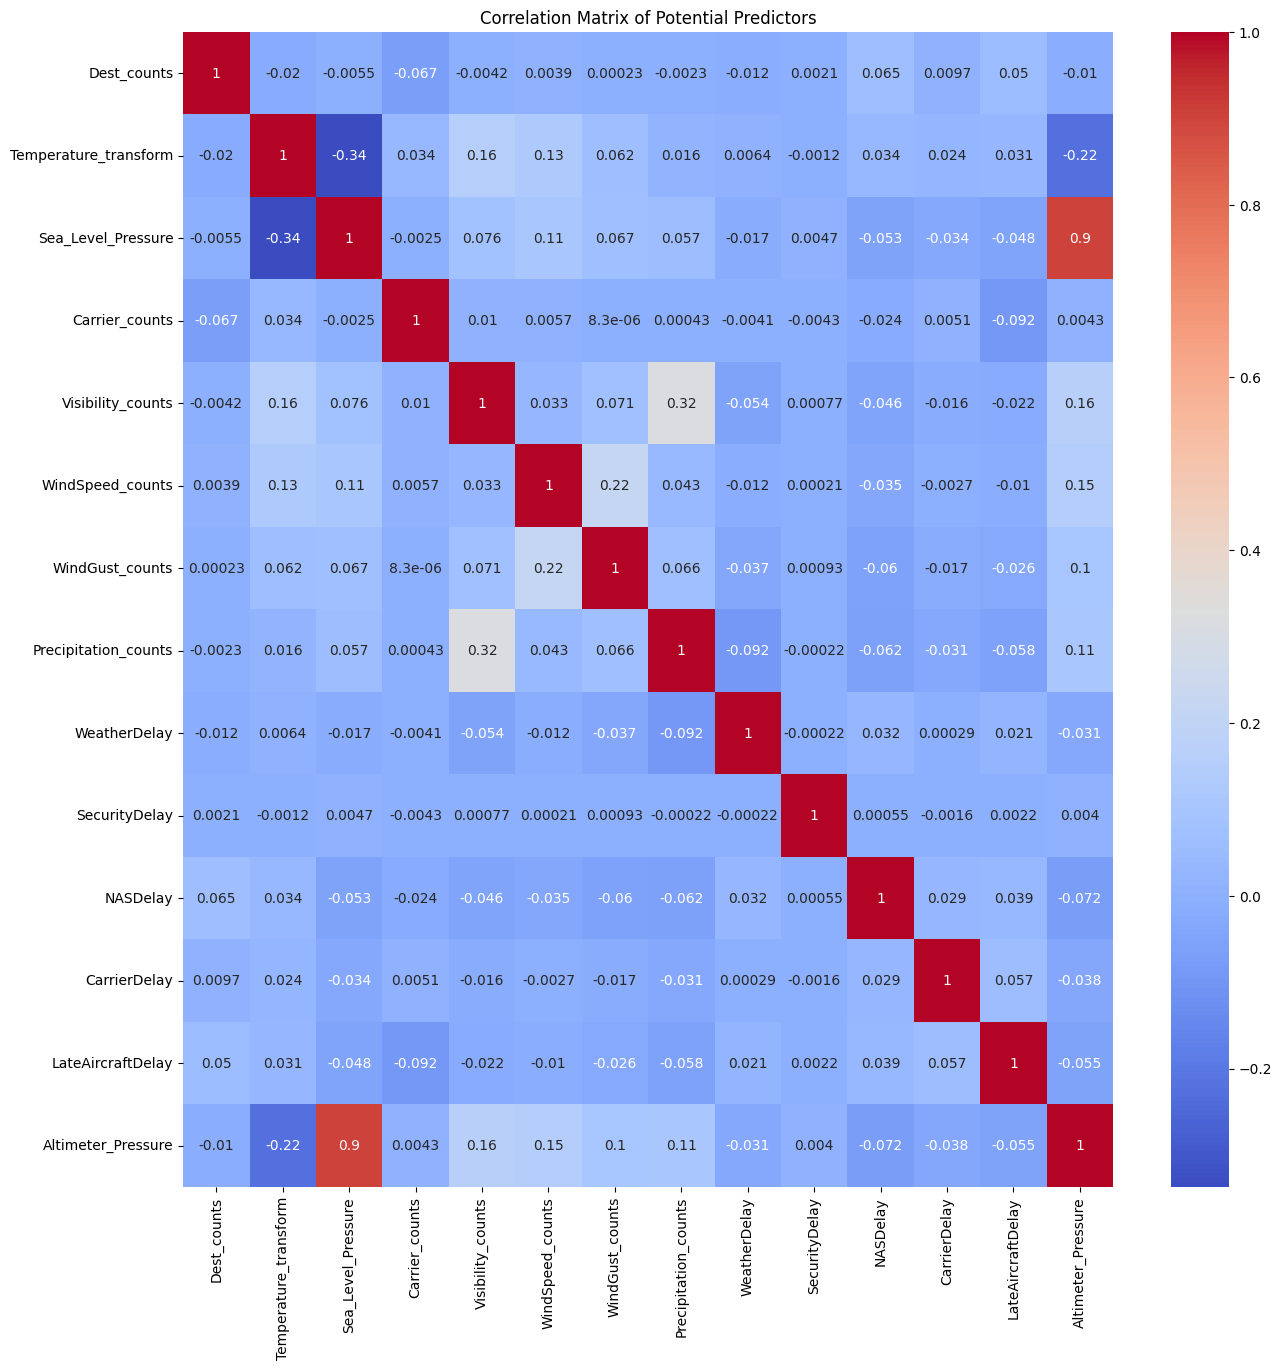

In [269]:
df_pred = df[["Dest_counts", "Temperature_transform", "Sea_Level_Pressure", 
              "Carrier_counts","Visibility_counts", "WindSpeed_counts", 
              "WindGust_counts", "Precipitation_counts", "WeatherDelay", 
              "SecurityDelay", "NASDelay", "CarrierDelay", "LateAircraftDelay",
               "Altimeter_Pressure"]]
corr_matrix = df_pred.corr()
fig, ax = plt.subplots(figsize=(15 ,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Potential Predictors")
plt.show()

It appears from this correlation matrix most the correlations between our predictor varibles are extremely weak. The big exception is Altimeter_Pressure and Sea_Level_Pressure, which makes sense. I will use Altimeter_Pressure insted of Sea_Level_Pressure because I think from the histograms it's more normally distributed and pressure at the elevation of the airport is of more immediate importance to takeoff then the pressure at sea level.

### EDA Summary
**Missing Values:** There was a lot of missing values in CancellationReason and the different types of delays columns but I was able to attribute that to those aircrafts not being cancelled or delayed so I replace those missing values with zeros.

**Outliers:** Although there are outliers, I was unable to discard any of them due to human error.

**Distributions:** Most variables seemed fairly normally distributed, but I did transform Temperature with squared transform. No variables had very large values so I did not scale any of them.

**Value Encoding:** I decided to encode values for Visibility, WindSpeed, WindGust, Percipitation, and Ice Accretion becuase they were very biased towards a normal value and they have standardized categories. Then I decided the encode values for Dest, Carrier, and CancellationReason in order to turn those variables into numerical data.

**Correlations:** There are suprisingly very little correlations between any of variables. The biggest correlation is strong positive between Sea_Level_Pressure and Altimeter_Pressure


### Feature Selection
While training my machine learning models I discovered my initial predictors had very, very little to no impact on the accuracy of my model. By only training on the initial features I selected my model was performing little better than guessing. I decided to a bit of manual feature selection by training my model on individual columns and seeing which ones contributed the most to the AUC and accuracy scores. I discovered CarrierDelay, SecurityDelay, WeatherDelay, NASDelay, and LateAircraftDelay all had a big effect on my model's performance. Initially, I was going to use these facts as response variables instead of predictors because I thought if the plane wasn't delayed why would there be a value other than 0 for these columns? Then I performed the following query to test this assumption:

In [198]:
df_q = df.query("Delayed == 0 and (WeatherDelay>0 or CarrierDelay>0 or SecurityDelay>0 or NASDelay>0 or LateAircraftDelay>0)")
df_q = df_q[["WeatherDelay", "CarrierDelay", "SecurityDelay", "NASDelay", "LateAircraftDelay"]]
df_q.describe()

,WeatherDelay,CarrierDelay,SecurityDelay,NASDelay,LateAircraftDelay
count,19344.000000,19344.000000,19344.0,19344.000000,19344.000000
mean,0.001706,0.625672,0.0,28.705025,0.018145
std,0.237269,5.157953,0.0,18.061784,1.905277
min,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.0,18.000000,0.000000
50%,0.000000,0.000000,0.0,23.000000,0.000000
75%,0.000000,0.000000,0.0,34.000000,0.000000
max,33.000000,157.000000,0.0,253.000000,258.000000


This query shows there is almost 20,000 entries where the plane was not delayed during take off but there was concerns that left unsolved might have caused the plane to be delayed. This will now be considered in my revised feature selection.

### Predictor Variables
* Dest
    * Different airports have different levels of airtraffic the can cause planes to have to wait and circle the airport before landing. This can cause a delay for the next flights using that same plane
    * using Dest_counts
* Carrier
    * Different airlines might have different standards of manufacuting or protocols that could result in a delay, such as using a plane model that has lower engine life expectany
    * using Carrier_counts
* Temperature
    * Differences in Temperature impact the likelyhood of pressure changes, icing, and wind speed, all of which can destabilize the plane during takeoff and landing. However since we have these other variables, Temperature might be highly correlated
    * using Temperature_transform
* Altimeter Pressure
    * Pressure changes can cause aborted landings because of air currents between higher and lower pressure destabilizing the plane. This could cause delays for future planes taking off
    * using Altimeter_Pressure
* Visibility
    * Visibility impacts the way planes takeoff and land, so it can also cause the delaying of takeoff and landing
    * using Visbility_counts
* Wind Speed
    * Cross-winds are very dangerous when flying especially during takeoff and landing as they destabilize the plane, so this could be a crucial factor determining flight delays
    * using WindSpeed_counts
* Wind Gust
    * Same reason as Wind Speed, althought could be redundant
    * using WindGust_counts
* Precipitation
    * Weather conditions are one of the causes of cancellations so they also have an impact on flight delays
    * using Precipitation_counts
* Ice Accretion
    * Ice Accretion is one of the most dangerous things when flying because if it melts too quickly during landing it can cause sudden imbalance. This could cause delays for future planes taking off
    * using Ice_counts
* Carrier Delay
    * Minutes delayed by Airline, usually due to mechanical or staffing issues, if the issue is not solved before takeoff the plane will be delayed
    * using CarrierDelay
* Weather Delay
    * Minutes delayed by Weather, also includes weather enroute and weather at the destination airport. If the weather does not clear up before takeoff then the plane is delayed
    * using WeatherDelay
* NAS Delay
    * Minutes delayed by Air Traffic Control, this is usually because of congested air traffic patterns. If this is not resolved before takeoff the plane will be delayed
    * using NASDelay
* Security Delay
    * Minutes delayed due to Security protocals or issues. If the issue is not solved before takeoff, the plane might be delayed
    * using SecurityDelay
* Late Aircraft Delay
    * Minutes delayed due to the aircraft arriving late, this can cause the whole process of preparing the plane for flight and passengers again to be delayed, potentially causing the flight to be delayed.
    * using LateAircraftDelay
* Cancelled
    * If a plane is cancelled, it's delayed for an indefinite amount of time
    * using Cancelled
* Cancellation Reason
    * The reasons planes are cancelled can give us clues for what reasons planes might be delayed
    * using Cancellation_counts

I will not be using Origin because there is only one value for Origin in this dataset (ATL). I also will not be using Time because the format of the values it a little confusing and I don't know if I would decode it correctly. If I was doing this for a client I would ask for clarification about the values in that column.

### Response Variable
* Delayed
    * The question we're trying to answer: will the plane be delayed?
    * using Delayed

### Training Machine Learning Models

##### MODELS
- Logistic Regression
    - Logistic Regression can extend to multiple classes so if for example we wanted to add a response variable to approximate the minutes delayed, we could do so without having to start from scratch with a whole different model
    - Logistic Regression is very fast at test time, and easy to train and implement
    - Logistic Regression outputs clear results in a way a non-technical audience can understand well

- Random Forest
    - Random Forest is robust to noise and as we couldn't eliminate any outliers this will be helpful to generalize our model
    - Random Forest can handle a wide variety of data types if we wanted to expand the width of our dataset
    - Random Forest is computationally expensive on large datasets but can use parallel processing to speed up training time

- Naive Bayes
    - Naive Bayes scales well and since this dataset has the potential to be billions of rows, it would be beneficial to train a model that can scale up with the data
    - Naive Bayes relies on independent featues, and judging from my correlation matrix these features are fairly independent
    - Naive Bayes is very fast at training and test time

In [199]:
# importing machine learning modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

Splitting the Data

In [243]:
df_pred = df[["Dest_counts", "Temperature_transform", "Altimeter_Pressure"
              "Carrier_counts", "Visibility_counts", "WindSpeed_counts", 
              "WindGust_counts", "Precipitation_counts", "Ice_counts", 
              "WeatherDelay", "SecurityDelay", "NASDelay", "CarrierDelay", 
              "LateAircraftDelay", "Cancelled"]]

In [248]:
df_pred = df[["NASDelay", "CarrierDelay", "WeatherDelay", "LateAircraftDelay", "Dest_counts", "SecurityDelay", "Altimeter_Pressure"]]

In [249]:
X = df_pred.values
y = df["Delayed"].values

#### Training Logistic Regression Model

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [251]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

LogisticRegression()

In [252]:
y_pred = logReg.predict(X_test)

In [253]:
# AUC Score
accuracy = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {accuracy}")

AUC Score: 0.7147694402760097


In [254]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.7886305046672769


In [255]:
# Cross Validation
kf = KFold(n_splits=3, random_state=42, shuffle=True)
scores = cross_val_score(logReg, X, y, cv=kf)
print('Cross-validated scores:', scores)
print("Mean: ", scores.mean())

Cross-validated scores: [0.78806362 0.78849817 0.78908451]
Mean:  0.7885487688052432


#### Training Random Forest Classifier

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [257]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [258]:
y_pred = rf.predict(X_test)

In [259]:
# AUC Score
accuracy = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {accuracy}")

AUC Score: 0.7177295647356116


In [260]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.7886791451653555


In [261]:
# Cross Validation
kf = KFold(n_splits=3, random_state=42, shuffle=True)
scores = cross_val_score(rf, X, y, cv=kf)
print('Cross-validated scores:', scores)
print("Mean: ", scores.mean())

Cross-validated scores: [0.78760994 0.7877606  0.78884308]
Mean:  0.7880712066855757


#### Training Naive Bayes Classifier

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [263]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [264]:
y_pred = nb.predict(X_test)

In [265]:
# AUC score
accuracy = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {accuracy}")

AUC Score: 0.7142256245068662


In [266]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.7874587108499264


In [267]:
# Cross Validation
kf = KFold(n_splits=3, random_state=42, shuffle=True)
scores = cross_val_score(rf, X, y, cv=kf)
print('Cross-validated scores:', scores)
print("Mean: ", scores.mean())

Cross-validated scores: [0.78760994 0.7877606  0.78884308]
Mean:  0.7880712066855757


### Model Performance Summary
##### Logistic Regression
AUC Score: 0.7147669453126967

Accuracy Score: 0.7886305046672769

Cross-validated scores: [0.78728095 0.78763856 0.78839205]
Mean:  0.7877705194633683

##### Random Forest
AUC Score: 0.7135973410047886

Accuracy Score: 0.7881617871403367

Cross-validated scores: [0.78757545 0.78773673 0.78857511]

Mean:  0.7879624285863193

##### Naive Bayes
AUC Score: 0.7142256245068662

Accuracy Score: 0.7871226492268372

Cross-validated scores: [0.78757545 0.78773673 0.78857511]

Mean:  0.7879624285863193

### Conclusion

Although all three models I trained performed very similiarly, I think Logistic Regression is the best performing model for this dataset. Becuase Logisitc Regression is based on probabilities, it's very easy to understand what features are good indicators of the outcome and interperting the result. This can be especially useful when implementing something that the general public might use and want to understand how to model arrived at the conclusion it did. Logistic Regression also scales well as the data increases. Initial, I was training these models on a dataset with 20 airports that had about 30 billion entries, however I had to scale down because of the computational limits of my computer. But as that dataset is an example with only 20 airports, when this model is applied somewhere the data can scale exponentially, so it's very important the model can scale well with the data. Logistic Regression's quick runtime also comes in handy for the 30 minutes to a few hours timeline of the average flight delay, as well as appeasing anxious passengers quickly. Flight Delays althought sometimes very inconvienent, are not usually life or death situations. This model would be used more to appease passengers so that they can prepare better for if their flight is delayed. A significant percentage of passenger dissatisfaction with airlines is from flight delays. I theorize if there is more imformation and communication with the passengers about delays, passengers would be more open or satisfied with their experience. If a passenger can input their flight information into a model and output the likelyhood of their flight being delayed and for how long, then they can have time to prepare for the possiblity of such an outcome. To improve this model I think training on a greater variety of data would be beneficial, particularly in balancing out the bias between Delayed and Not Delayed. Then the model can also be generalized for any airport, any airline. Additionally, as I originally wanted to do we could expand this model to give an estimate for how long the plane might be delayed, futher helping passenger, airlines, and the airport prepare better.

Over the course of this project I learned a lot of invaluable skills. I learned how to work with a realworld dataset, allowing me to experience cleaning data non-data analysts entered, resulting in unstandardized naming conventions, missing values, unclear and skewed data, and outliers. I learned how to work with a large dataset, where I had to rethink some of my normal stategies for visualizations like if there was too many values to make a barchart or displaying plots in a way that was meaningful. But the most important thing I think I learned was that sometimes your initial strategy will not work. I found original dataset I used with 20 airports was taking a very long time to perform operations on such as making the heatmap, correlation matrix, and training the models. So I downsized my dataset to just one airport. If we can make an effective model for one airport, then we can expand it to multiple later. Additionally, the predictor values I initially picked to train my models on did little better than guessing. That confused me for a bit, but I was able to figure out new strategies to find predictors variables that did improve my models. In the future I think I could do more in depth EDA, which might have clued me in on the problem with my predictor variables. I hope to stay flexible with my ideas and approaches in the future if something like this happens. This is also a good experience for if you implement something and then your boss or client decides they want change it; you have to have a calm and open mind to be able to work with unexpected changes effectively. I also think it would be benefical to split this program into at least two files: one for EDA and data cleaning, and one for training the models. I think it would be easier and safer in the models only had access to the cleaned data, so you don't accidently use the wrong data or the training crashes and then you have to rerun all the EDA again. If this model were to be actually used you then have a third program as a user interface that would take in data from the passenger, send it through the trained model, and output its predictions.

### References
**Dataset:** Flight Ontime Reporting with Weather by William Parker

Parker, William. “Flight Ontime Reporting with Weather.” Kaggle.com, 2024, www.kaggle.com/datasets/williamparker20/flight-ontime-reporting-with-weather/data. Accessed 13 Dec. 2024.

**Visibility Standard Categories for Aviation:** Think Aviation

“The Differences between VFR, MVFR, IFR and LIFR.” ThinkAviation, 4 June 2018, www.thinkaviation.net/levels-of-vfr-ifr-explained/.

**Wind Speed and Wind Gust Standard Categories:** Beaufort scale from the National Weather Service.

US Department of Commerce, NOAA, National Weather Service. “Beaufort Scale.” Weather.gov, 2019, www.weather.gov/pqr/beaufort.

**Precipitation Standard Categories:** Barani Design Meteorological Sensors and Weather Stations

Barani, Jan. “Rain Rate Intensity Classification.” BARANI DESIGN Technologies, 19 Jan. 2020, www.baranidesign.com/faq-articles/2020/1/19/rain-rate-intensity-classification.

**Ice Accretion Categories:** Weather.gov

Weather.gov. “Icing Hazards.” Weather.gov, 2019, www.weather.gov/source/zhu/ZHU_Training_Page/icing_stuff/icing/icing.htm.

‌